# Predicting titanic deaths with Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

/home/roberto/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('ML_Titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df['Survived']

In [4]:
scaler = MinMaxScaler((-1, 1))

In [5]:
scaler.fit_transform(X)

array([[ 1.        , -0.75      , -1.        , -0.97169788],
       [-1.        , -0.75      , -1.        , -0.72172853],
       [ 1.        , -1.        , -1.        , -0.96906286],
       ...,
       [ 1.        , -0.75      , -0.33333333, -0.9084573 ],
       [-1.        , -1.        , -1.        , -0.8828878 ],
       [ 1.        , -1.        , -1.        , -0.96974601]])

In [6]:
logreg = LogisticRegression(max_iter=1000).fit(X, y) # Fit model

permutation_score = permutation_importance(logreg, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,Pclass,0.103367
2,Parch,0.01257
3,Fare,0.008081
1,SibSp,-0.000112


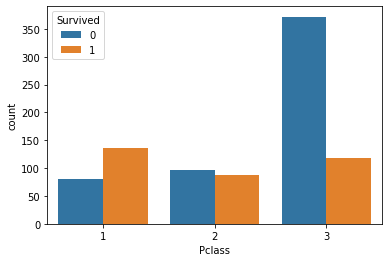

In [7]:
sns.countplot(X['Pclass'], hue=y); #0- Died, 1- Survived

In [8]:
logreg.score(X, y)

0.6879910213243546

# Predicting titanic deaths with XGBClassifier

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

In [10]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_class.fit(X_train, y_train, eval_metric='logloss')


y_pred = xgb_class.predict(X_val)

In [11]:
accuracy_score(y_val, y_pred)*100

70.1492537313433

In [12]:
difference = pd.DataFrame({'True': y_val, 'Forseen': y_pred})
difference

,True,Forseen
709,1,0
439,0,0
840,0,1
720,1,0
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [13]:
df.to_csv('Titanic.csv')